In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender=pd.read_csv('gender_submission.csv')
%matplotlib inline

# 1. 描述統計分析與資料類型

In [2]:
data=train.append(test)
data.reset_index(inplace=True,drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


C:\Users\shawn\AppData\Local\Temp\ipykernel_12928\217576017.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


## 年齡特徵欄位有177欄缺失值，船艙號碼特徵欄位有687欄缺失值，於船的口岸有2欄缺失資料

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# 2. 多元線性回歸模型（並附上統計摘要表）

In [30]:
import statsmodels.api as sm

Class2 = sm.formula.ols(formula='Age ~ Survived + SibSp', data=data)
# 'Age'為應變量，'Survived'和'SibSp'為自變量
model2 = Class2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     40.31
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           2.62e-17
Time:                        23:59:16   Log-Likelihood:                -2884.9
No. Observations:                 714   AIC:                             5776.
Df Residuals:                     711   BIC:                             5790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.1709      0.730     45.410      0.000      31.737      34.605
Survived      -2.4414      1.051     -2.324      0.020      -4.504      -0.379
SibSp         -4.8383      0.555     -8.712      0.000      -5.929      -3.748
==============================================================================
Omnibus:                       33.291   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.904
Skew:                           0.554   Prob(JB):                     9.69e-09
Kurtosis:                       3.113   Cond. No.                         2.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'linear regression')

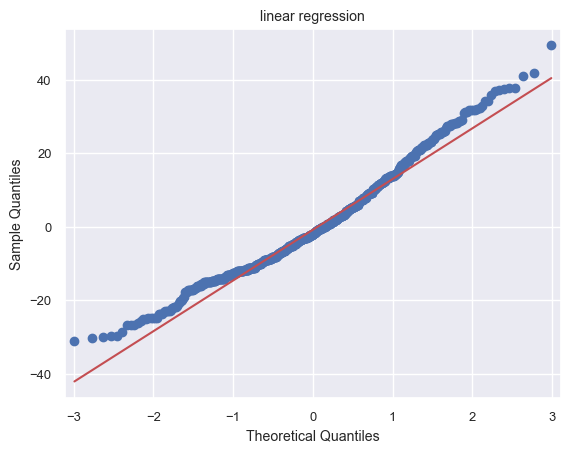

In [31]:
data_1 = sm.ProbPlot(model2.resid)
data_1.qqplot(line='q')
plt.title('linear regression')

## 以'Age'作為應變量，'Survived'和'SibSp'作為自變量

# 3. 變異數分析（並附上統計摘要表）

In [28]:
import pingouin as pg
import pandas as pd
import researchpy as rp
a=rp.summary_cont(data['Survived'].groupby(data['Pclass']))
b=rp.summary_cont(data['Survived'].groupby(data['Embarked']))

print(a)
print("======================================================")
print(b)





          N    Mean      SD      SE  95% Conf.  Interval
Pclass                                                  
1       216  0.6296  0.4840  0.0329     0.5647    0.6945
2       184  0.4728  0.5006  0.0369     0.4000    0.5456
3       491  0.2424  0.4289  0.0194     0.2043    0.2804
            N    Mean      SD      SE  95% Conf.  Interval
Embarked                                                  
C         168  0.5536  0.4986  0.0385     0.4776    0.6295
Q          77  0.3896  0.4909  0.0559     0.2782    0.5010
S         644  0.3370  0.4730  0.0186     0.3004    0.3736


In [6]:
data.anova(dv='Survived',between=['Pclass','Embarked']).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Pclass,21.528,2.0,10.764,52.103,0.000,0.106
1,Embarked,3.934,2.0,1.967,9.522,0.000,0.021
2,Pclass * Embarked,0.382,4.0,0.096,0.462,0.763,0.002
3,Residual,181.800,880.0,0.207,NaN,NaN,NaN


# 4. 互動式儀表版(interactive dashboard)

In [29]:
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt

@interact
def create_fare_plot(col=train.drop(['Fare', 'Age'], axis=1).columns)：
    sns.barplot(data=train, x=col, y='Fare')
    plt.title(f'{col}')

interactive(children=(Dropdown(description='col', options=('PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',…

#### 根據用戶選擇的不同列名（col），將根據該列對Fare進行分組並計算平均值

# 5. 趨勢分析圖(trend line)

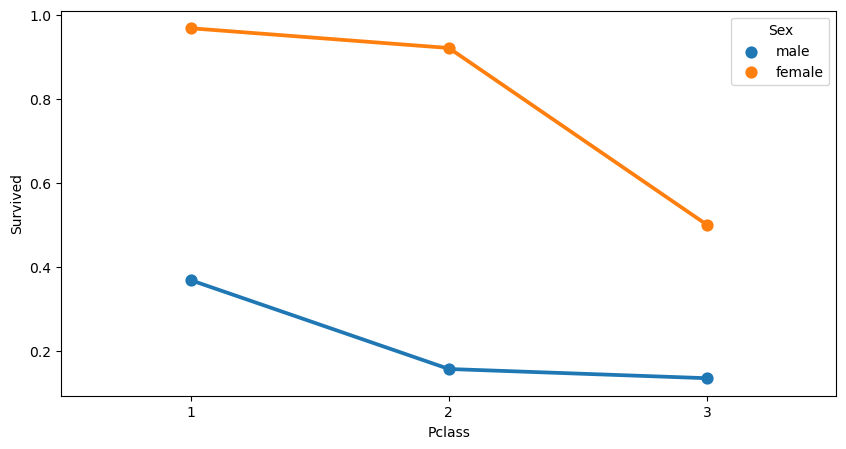

In [10]:
plt.figure(figsize= (10 ,5))
sns.pointplot(data=data,x="Pclass",y="Survived",hue="Sex",ci=None)
plt.show()

## 以使用性別來進行分類時，女性的生存率遠高於男性

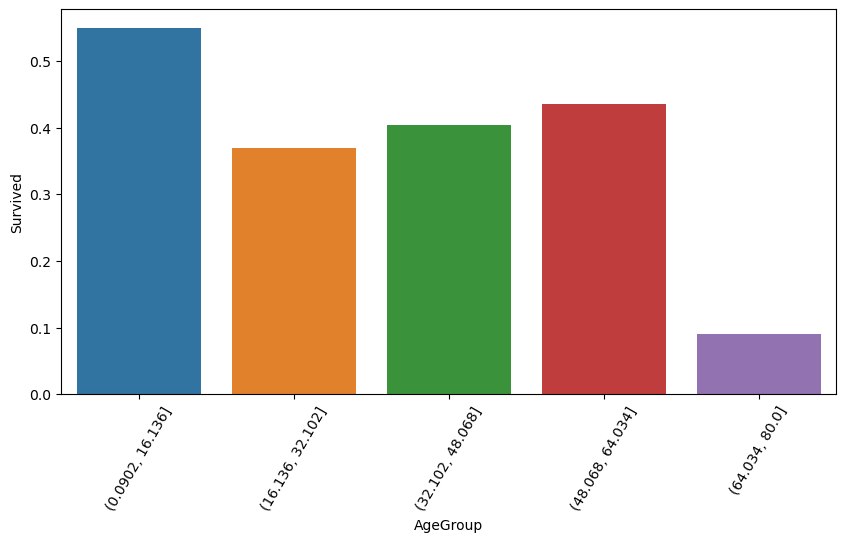

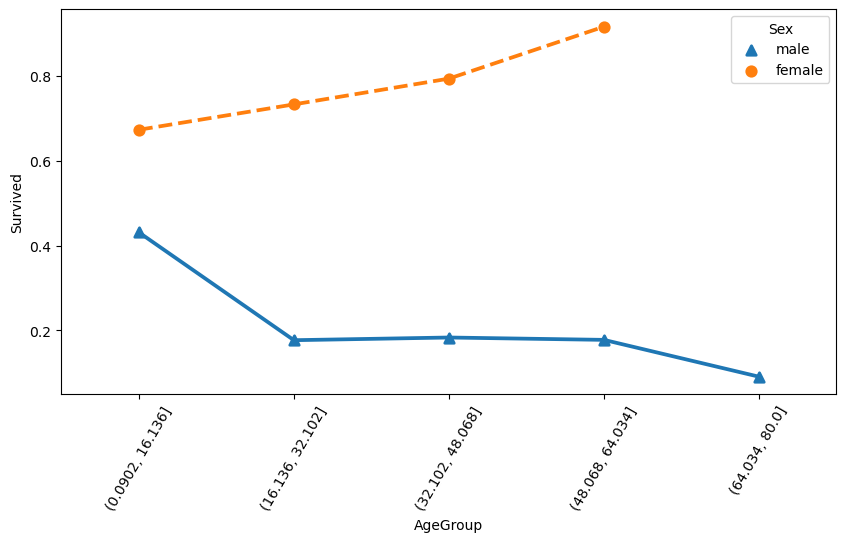

In [11]:
data["AgeGroup"] = pd.cut(data["Age"], 5)
# 使用pd.cut函數將年齡（Age）分為5個區間，並將結果保存在新的數據列AgeGroup中

data.AgeGroup.value_counts(sort=False)
# 計算每個年齡組的計數，並根據AgeGroup列進行排序

plt.figure(figsize=(10, 5))
# 創建一個新的圖形，指定圖形的大小為10x5

sns.barplot(data=data, x="AgeGroup", y="Survived", ci=None)
# 使用barplot函數繪製條形圖，x軸為年齡組（AgeGroup），y軸為存活率（Survived），ci=None表示不顯示置信區間

plt.xticks(rotation=60)
# 設置x軸刻度標籤的旋轉角度為60度

plt.show()
plt.figure(figsize=(10, 5))

sns.pointplot(data=data, x="AgeGroup", y="Survived", hue="Sex", ci=None,
             markers=["^", "o"], linestyles=["-", "--"])
# 使用pointplot函數繪製點狀圖，x軸為年齡組（AgeGroup），y軸為存活率（Survived），hue="Sex"表示按性別分類，ci=None表示不顯示置信區間
# markers和linestyles參數分別指定點和線的樣式

plt.xticks(rotation=60)
# 設置x軸刻度標籤的旋轉角度為60度

plt.show()
# 顯示圖形



## 以年齡作為分類時，年齡越大的乘客生存率越低

C:\Users\shawn\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


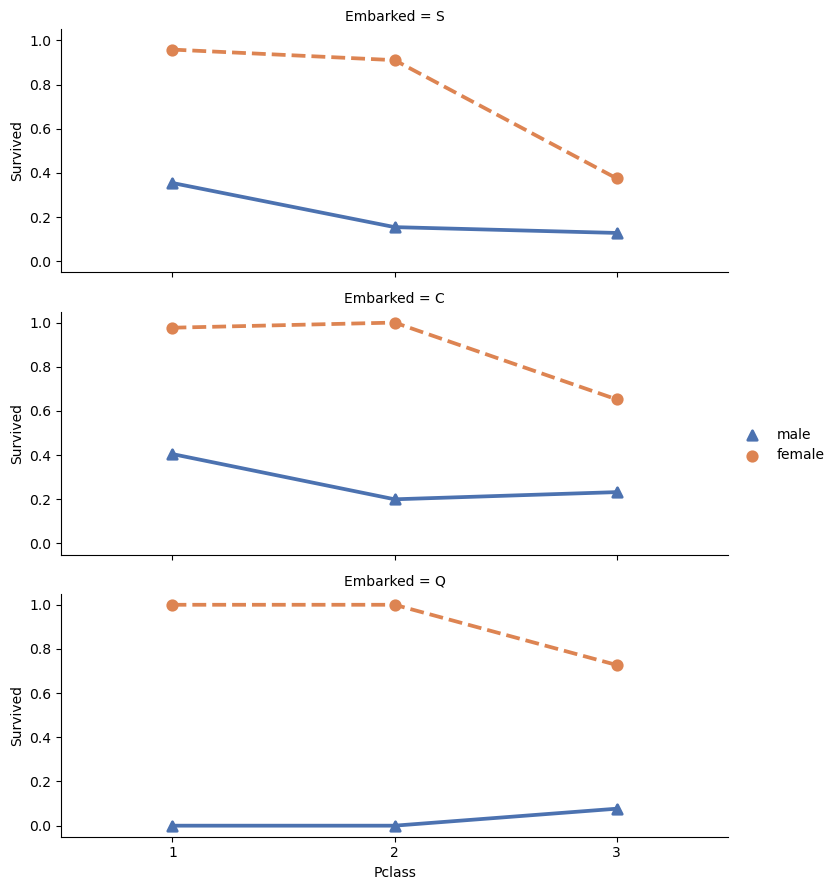

In [12]:
data.pivot_table(values="Survived",index="Sex",columns=["Pclass","Embarked"],aggfunc=np.mean)

sns.FacetGrid(data=data,row="Embarked",aspect=2.5)\
.map(sns.pointplot,"Pclass","Survived","Sex",hue_order=["male","female"],ci=None,palette="deep", 
     markers=["^", "o"], linestyles=["-", "--"]).add_legend()

## 以港口作為分類時，生存率依序為：C>Q>S

# 6. 集群熱力圖(cluster map)

Text(0.5, 1.0, 'Correlation coefficient')

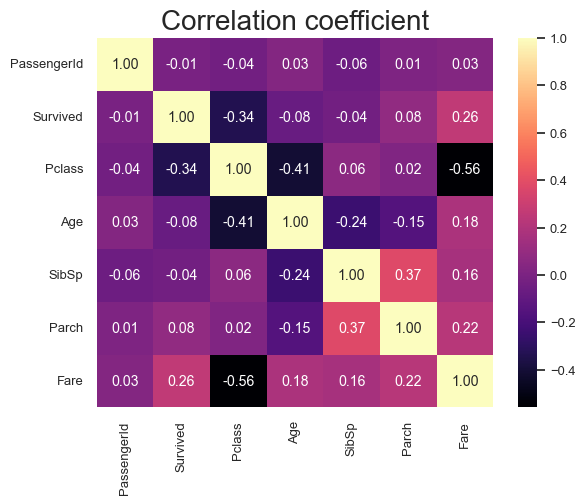

In [13]:
import seaborn as sns

sns.set(font_scale=0.85)
# 設置Seaborn的字體縮放比例為0.85

hm = sns.heatmap(data.corr(), cmap="magma", annot=True, fmt=".2f")
# 使用heatmap函數繪製熱力圖，data.corr()計算數據中的特徵相關性，cmap="magma"設置顏色映射為magma，
# annot=True表示在熱力圖中顯示數值，fmt=".2f"設置數值顯示的格式為浮點數，保留兩位小數

hm.set_title("Correlation coefficient", fontdict={"size": 20})
# 設置熱力圖的標題為"Correlation coefficient"，並設置標題的字體大小為20


# 7. 圓餅圖(pie plot)

<AxesSubplot:ylabel='Survived'>

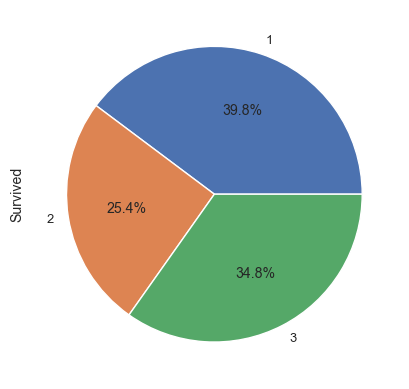

In [14]:
data.groupby('Pclass').Survived.sum().plot(kind='pie',autopct='%.1f%%')

# 8. 散布圖（scatter plot）

<AxesSubplot:xlabel='Age', ylabel='Fare'>

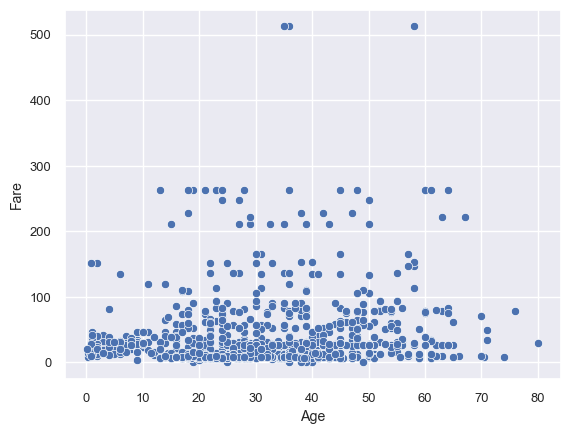

In [15]:
sns.scatterplot(data=data, x='Age', y='Fare')

#### 將數據集中的年齡（Age）和票價（Fare）以散點圖的形式呈現

# 9. 盒狀圖(box plot)

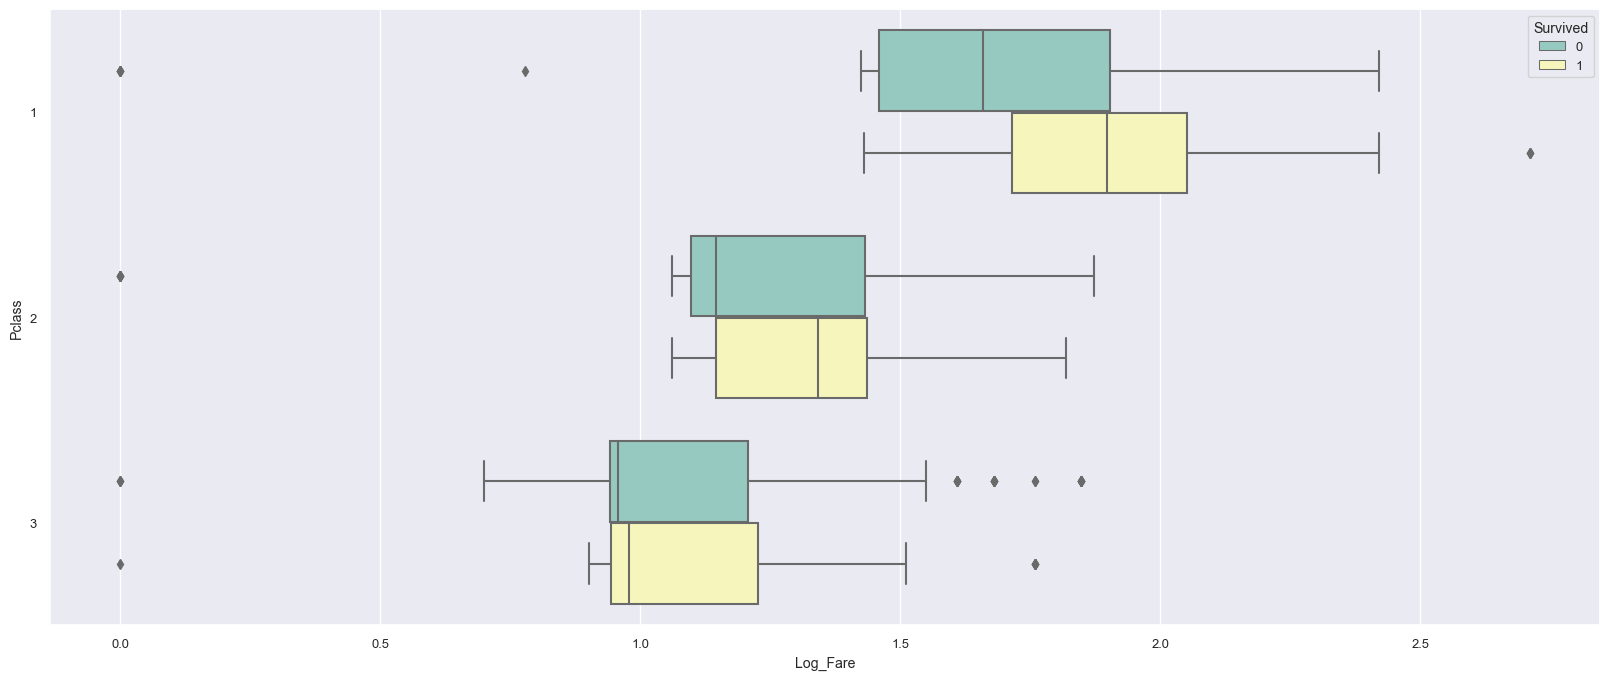

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))

train['Log_Fare'] = (train['Fare'] + 1).map(lambda x: np.log10(x) if x > 0 else 0)
# 將Fare列的值加1後進行對數轉換，如果值大於0，否則設置為0，並創建一個新的Log_Fare列

sns.boxplot(y='Pclass', x='Log_Fare', hue='Survived', data=train, orient='h', ax=ax, palette="Set3")
# 使用Seaborn的boxplot函數繪製箱形圖，y軸為Pclass列的值，x軸為Log_Fare列的值，根據Survived列的值對圖形進行著色，
# 使用train數據集，水平顯示箱形圖，將圖形繪製在之前創建的軸物件上，使用Set3顏色調色板

pivot_table = pd.pivot_table(train, values=['Fare'], index=['Pclass'], columns=['Survived'], aggfunc='median').round(3)
# 使用Pandas的pivot_table函數計算在Pclass和Survived條件下

## 將乘客的船票價格（Fare）按照不同的乘客等級（Pclass）和生存狀態（Survived）進行可視化和分析

# 10. 雙變量圖（joint plot）

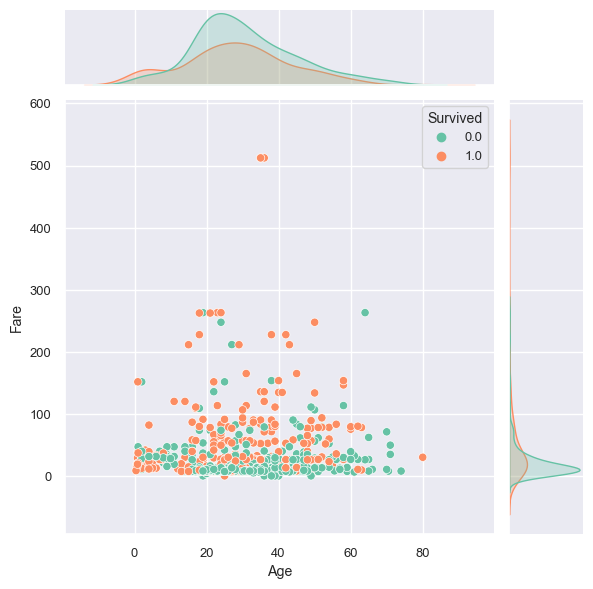

In [26]:
sns.jointplot(x='Age',y='Fare',hue='Survived',data=data, palette='Set2')

#### 顯示年齡（Age）和票價（Fare）之間的關係，同時根據Survived（是否生還）

# 補充1. 盒狀圖（box plot）&散布圖（scatter plot）

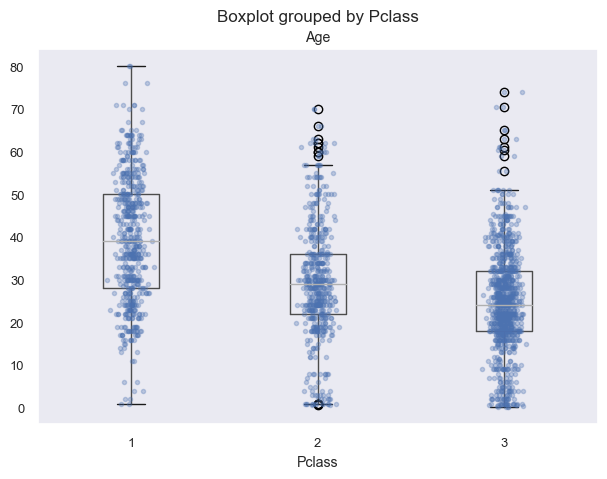

In [27]:
data.boxplot(column='Age', by='Pclass', grid=False, figsize=(7, 5))
# 使用boxplot函數繪製盒形圖，column='Age'表示以Age列的數據繪製盒形圖，by='Pclass'表示按照Pclass列進行分組，
# grid=False表示不顯示網格線，figsize=(7, 5)表示設置圖形的大小為7x5

for i in [1, 2, 3]:
    y = data.Age[data.Pclass == i].dropna()
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'b.', alpha=0.3)

for i in [1, 2, 3]:
    # 遍歷乘客等級1、2、3

    y = data.Age[data.Pclass == i].dropna()
    # 從Age列中選擇指定乘客等級的數據，並且去除缺失值

    x = np.random.normal(i, 0.04, size=len(y))
    # 生成與y數據相同長度的正態分佈隨機數，用於散點圖的x座標

    plt.plot(x, y, 'b.', alpha=0.3)
    # 使用散點圖繪製x和y的數據點，'b.'表示使用藍色點標記，alpha=0.3表示設置點的透明度為0.3